![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


filename_features = "features.txt"
filename_labels = "activity_labels.txt"

filename_subtrain = "train/subject_train.txt"
filename_xtrain = "train/X_train.txt"
filename_ytrain = "train/y_train.txt"

filename_subtest = "test/subject_test.txt"
ffilename_xtest = "test/X_test.txt"
filename_ytest = "test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")['nome_var']
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])['subject_id']
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])['subject_id']
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [19]:
# dividindo treino e validação
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

In [20]:
prcomp = PCA().fit(X_train)

In [21]:
# variancia acumulada
prcomp.explained_variance_ratio_.cumsum()

array([0.62452539, 0.67397069, 0.71579576, 0.73529217, 0.75225902,
       0.76478322, 0.77640896, 0.78729067, 0.79699221, 0.8055563 ,
       0.81299381, 0.81968413, 0.82554872, 0.83120242, 0.8361413 ,
       0.84087997, 0.84554446, 0.84992139, 0.85416132, 0.85821017,
       0.86212143, 0.86584335, 0.8694224 , 0.87285479, 0.87614919,
       0.87933298, 0.88235968, 0.88528707, 0.88815388, 0.89095   ,
       0.89370489, 0.89630571, 0.89882249, 0.90122072, 0.90355068,
       0.90579032, 0.90799903, 0.91013824, 0.91224897, 0.91425857,
       0.91620031, 0.91811819, 0.91994772, 0.9217394 , 0.92346325,
       0.92506299, 0.92661923, 0.92815495, 0.92966451, 0.93115202,
       0.93259975, 0.93401458, 0.93536442, 0.93666167, 0.93789159,
       0.93910154, 0.94027701, 0.94142906, 0.9425757 , 0.94365897,
       0.94472339, 0.94577774, 0.94681261, 0.94783138, 0.94883204,
       0.94980005, 0.95075561, 0.95167846, 0.95257087, 0.95345773,
       0.95432733, 0.9551579 , 0.9559705 , 0.95677406, 0.95755

In [22]:
def screeplot(princomp, ncomp = 0, varexplicada=0, criterio=1):
    
    if ncomp>0:
        ncomp_crit=ncomp
    elif varexplicada > 0:
        ncomp_crit = (princomp.explained_variance_ratio_.cumsum()<varexplicada).sum()+1 
        # Critério 1: autovalor padronizado > 1
    elif criterio == 1:
        ncomp_crit = (princomp.explained_variance_ratio_>1/princomp.n_components_).sum()
    else: ncomp_crit = None
    
    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
    plt.subplots_adjust(hspace=0, wspace=.15)


    num_componentes = np.arange(princomp.n_components_) + 1
    ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,0].set_title('Scree Plot - Variância total')
    ax[0,0].set_xlabel('Número de componentes')
    ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

    ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,0].set_xlabel('Número de componentes')
    ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


    ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[0,1].set_title('Scree Plot - Variância percentual')
    ax[0,1].set_xlabel('Número de componentes')
    ax[0,1].set_ylabel('Variancia explicada (percentual)')

    ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
    ax[1,1].set_xlabel('Número de componentes')
    ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')
    
    if ncomp_crit != None:
        # Linhas verticais de referência
        ax[0,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axvline(x = ncomp_crit, color = 'r', linestyle = '-', linewidth=.5)


        # linhas horizontais
        variancia               = princomp.explained_variance_[ncomp_crit-1]
        variancia_acumulada     = princomp.explained_variance_.cumsum()[ncomp_crit-1]
        pct_variancia           = princomp.explained_variance_ratio_[ncomp_crit-1]
        pct_variancia_acumulada = princomp.explained_variance_ratio_.cumsum()[ncomp_crit-1]
        
        ax[0,0].axhline(y = variancia              , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,0].axhline(y = variancia_acumulada    , color = 'r', linestyle = '-', linewidth=.5)
        ax[0,1].axhline(y = pct_variancia          , color = 'r', linestyle = '-', linewidth=.5)
        ax[1,1].axhline(y = pct_variancia_acumulada, color = 'r', linestyle = '-', linewidth=.5)


    print(f'Número de componentes:............... {ncomp_crit}')
    print(f'Variância da ultima CP:.............. {variancia:.2f}' )
    print(f'Variância total explicada:........... {variancia_acumulada:.2f}' )
    print(f'Variância percentual da última CP:... {100*pct_variancia:.2f}%' )
    print(f'Variância percentual total explicada: {100*pct_variancia_acumulada:.2f}%' )
    plt.show()
    return ncomp_crit

Número de componentes:............... 34
Variância da ultima CP:.............. 0.13
Variância total explicada:........... 50.20
Variância percentual da última CP:... 0.24%
Variância percentual total explicada: 90.12%


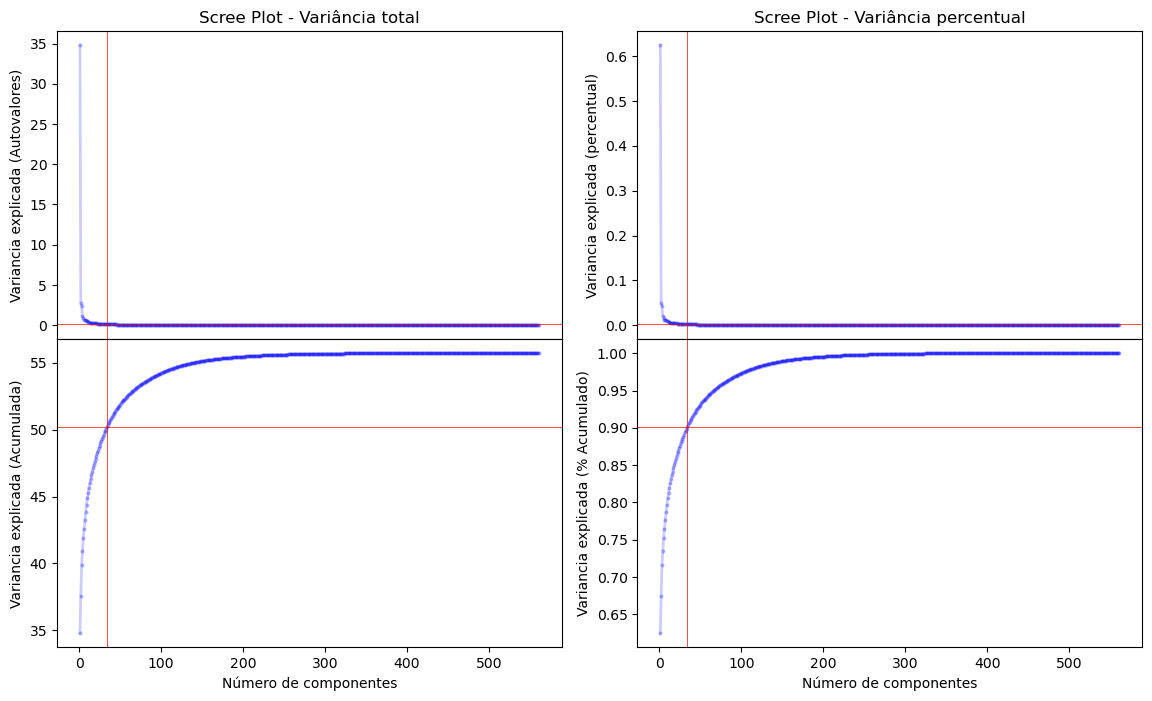

In [23]:
ncomp = screeplot(prcomp, varexplicada=.90)

In [24]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: total: 188 ms
Wall time: 188 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
4959,-0.137428,-0.025707,0.061618,-0.771714,-0.927433,-0.883644,-0.754856,-0.920377,-0.887630,-0.801627,...,-0.252632,0.555674,0.436451,-0.171926,0.437701,0.567131,-0.557505,1.983931,-0.968934,-2.559038
567,-0.078011,0.033977,-0.456226,-0.835366,-0.635551,-0.445943,-0.831719,-0.618357,-0.469202,-0.816565,...,-1.695800,1.011868,1.005208,0.233500,0.177402,0.597514,-0.459596,-0.885492,0.157432,0.432169
5532,0.199267,0.017045,-0.154786,-0.865884,-0.962469,-0.921170,-0.858273,-0.961918,-0.929269,-0.855852,...,0.453491,-1.357027,-1.012889,0.058781,0.461577,0.242146,-0.361530,0.767323,-1.255958,-1.229770
989,2.148918,-0.493915,-1.072181,1.280406,1.611911,0.887885,1.283611,1.461530,0.857201,1.117699,...,-1.199923,0.706855,0.297090,-2.017225,1.148011,1.523634,-0.870014,-0.388663,0.868052,0.364118
6068,0.038012,0.003679,-0.146933,-0.874181,-0.942526,-0.919348,-0.866449,-0.939151,-0.923212,-0.869506,...,1.005607,0.653148,0.575444,-0.037625,0.080648,0.279233,-0.740968,-0.660928,0.547646,0.317837


In [25]:
X_valid_pad = pd.DataFrame(X_valid).apply(padroniza, axis=0)
X_valid_pad.head()

,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
1723,1.574019,-0.151522,-0.813252,1.827175,1.721788,1.946883,1.777285,1.762640,1.904410,1.709424,...,-0.069264,-0.522814,-0.656360,-1.731893,0.424757,1.591193,-0.091524,-0.540513,0.622904,0.186787
6131,0.200483,0.054294,-0.040865,-0.842976,-0.951983,-0.928240,-0.833963,-0.952019,-0.935074,-0.837654,...,0.737232,-0.399760,-0.569587,0.523133,-0.700502,0.169696,0.305898,2.280985,-1.276807,-2.449092
6899,0.979265,-0.042947,-0.359787,0.973571,0.888432,0.936150,0.974943,0.941586,0.843829,1.285800,...,-0.131302,0.609313,0.170012,-1.940790,-1.147544,0.883944,-0.124560,-0.744583,0.345908,0.091109
1604,2.037679,-0.177007,-0.091884,0.727470,0.773582,0.825789,0.728839,0.771820,0.828852,0.681818,...,0.175530,0.280294,0.167187,-2.519261,0.496171,0.209723,1.299814,-0.153716,0.755460,1.046934
6956,-0.264600,0.051453,-0.201869,1.194389,0.876241,1.495439,1.074515,1.033816,1.450558,1.426736,...,0.473195,-1.483464,-0.996734,1.666426,1.496555,-1.445142,1.993941,-0.547227,0.617539,0.225394


In [26]:
prcomp_2 = PCA().fit(X_train_pad)

In [27]:
prcomp_2.explained_variance_ratio_.cumsum()

array([0.50728016, 0.57375468, 0.60249931, 0.62744127, 0.64651902,
       0.66393311, 0.67758961, 0.68955451, 0.69925343, 0.70867738,
       0.7172363 , 0.72520394, 0.73275958, 0.73932184, 0.74556788,
       0.751606  , 0.75758029, 0.76343553, 0.7691195 , 0.77435313,
       0.77939669, 0.78424255, 0.78902101, 0.79368828, 0.79815497,
       0.80249456, 0.80669126, 0.81069419, 0.81462603, 0.818466  ,
       0.82211488, 0.82568144, 0.8291453 , 0.83257775, 0.83585578,
       0.83912177, 0.84231328, 0.84525358, 0.8481444 , 0.85100556,
       0.8536897 , 0.85635099, 0.85896403, 0.86152653, 0.86404608,
       0.86652962, 0.86894865, 0.87132527, 0.87363203, 0.87587068,
       0.87806991, 0.88019033, 0.88225054, 0.88430427, 0.88632145,
       0.88830564, 0.89025182, 0.89217151, 0.89406003, 0.89592601,
       0.89773338, 0.89953458, 0.90132068, 0.90306944, 0.90476472,
       0.90643591, 0.90808161, 0.90969685, 0.9112951 , 0.91287193,
       0.91440857, 0.91593288, 0.91739924, 0.91884666, 0.92028

Número de componentes:............... 63
Variância da ultima CP:.............. 1.00
Variância total explicada:........... 505.64
Variância percentual da última CP:... 0.18%
Variância percentual total explicada: 90.13%


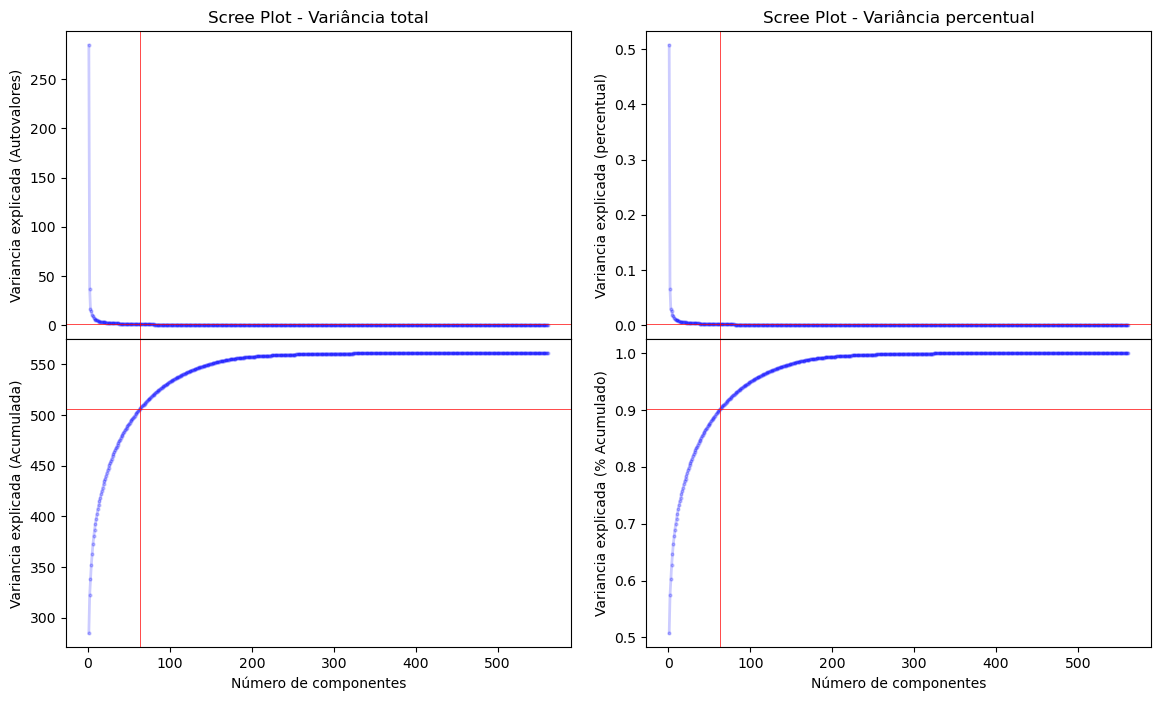

In [28]:
ncomp_2 = screeplot(prcomp_2, varexplicada=.90)

*Após a padronização estranhamente eu precisei de mais componentes para explicar 90%. Antes para atingir esse valor precisei de 34 componentes e depois da padronização precisei de 63 componentes.*

*Antes da padronização 1 componente explicava 62% da variabilidade e apos ela 1 componente explica apenas 50%.*

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [29]:
%%time
prcomp_2 = PCA(n_components=10).fit(X_train)

pc_treino_2 = prcomp_2.transform(X_train)
pc_valid_2 = prcomp_2.transform(X_valid)

pc_treino_2.shape

CPU times: total: 641 ms
Wall time: 97.9 ms


(5514, 10)

In [30]:
%%time
clf = DecisionTreeClassifier(ccp_alpha=0.001,random_state=1234).fit(pc_treino_2, y_train)

CPU times: total: 1.12 s
Wall time: 147 ms


In [31]:
print(f'A acurácia na base de treino foi: {clf.score(pc_treino_2, y_train)}')
print(f'A acurácia na base de validação foi: {clf.score(pc_valid_2, y_valid)}')

A acurácia na base de treino foi: 0.8977149075081611
A acurácia na base de validação foi: 0.8618063112078346


In [32]:
%%time
prcomp_3 = PCA(n_components=10).fit(X_train_pad)

pc_treino_3 = prcomp_3.transform(X_train_pad)
pc_valid_3 = prcomp_3.transform(X_valid_pad)

pc_treino_3.shape

CPU times: total: 1 s
Wall time: 112 ms


(5514, 10)

In [33]:
%%time
clf_2 = DecisionTreeClassifier(ccp_alpha=0.001,random_state=1234).fit(pc_treino_3, y_train)

CPU times: total: 1.12 s
Wall time: 145 ms


In [34]:
print(f'A acurácia na base de treino foi: {clf_2.score(pc_treino_3, y_train)}')
print(f'A acurácia na base de validação foi: {clf_2.score(pc_valid_3, y_valid)}')

A acurácia na base de treino foi: 0.8795792528110264
A acurácia na base de validação foi: 0.824265505984766


*Antes da padronização a acuracia na base de treino foi de 90% e na base de validação foi 86%. Após fazer a padronização obtivemos 88% de acurácia no treino e 82% na validação*